📈 Pairs Trading Strategy using Modularized Code

Imports

In [1]:
import os
import sys
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import fetch_data
from strategy import get_hedge_ratio, compute_spread, generate_zscore_signals
from backtester import compute_returns, backtest_pairs, compute_pnl_metrics, apply_trading_costs
from evaluator import evaluate_strategy
from trade_log import log_trades
from plotter import plot_cumulative_returns, plot_trade_signals

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)


Load Data

In [2]:
start_date = "2020-01-01"
end_date = "2024-01-01"
aapl_df = fetch_data('AAPL', start_date, end_date)
msft_df = fetch_data('MSFT', start_date, end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Combine and Prepare Close Prices

In [3]:
combined_df = pd.concat([aapl_df['Close'], msft_df['Close']], axis=1)
combined_df.columns = ['AAPL', 'MSFT']


Plot Correlation Heatmap

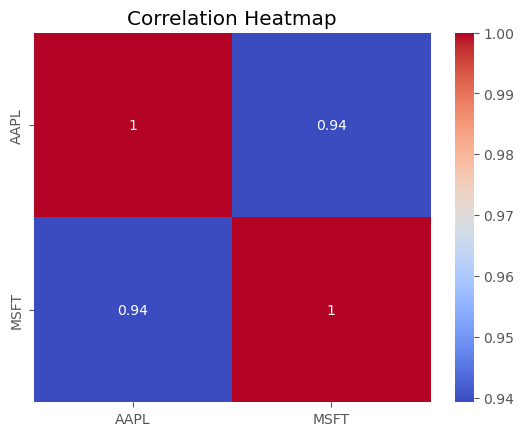

In [4]:
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Hedge Ratio & Spread

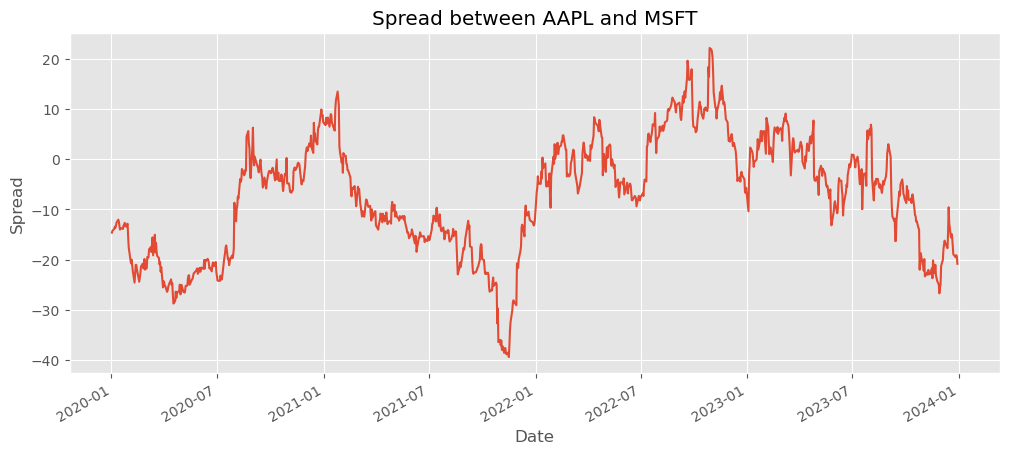

In [5]:
hedge_ratio = get_hedge_ratio(combined_df['AAPL'], combined_df['MSFT'])
spread = compute_spread(combined_df['AAPL'], combined_df['MSFT'], hedge_ratio)

spread.plot(figsize=(12, 5), title='Spread between AAPL and MSFT')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()


Generate Trading Signals

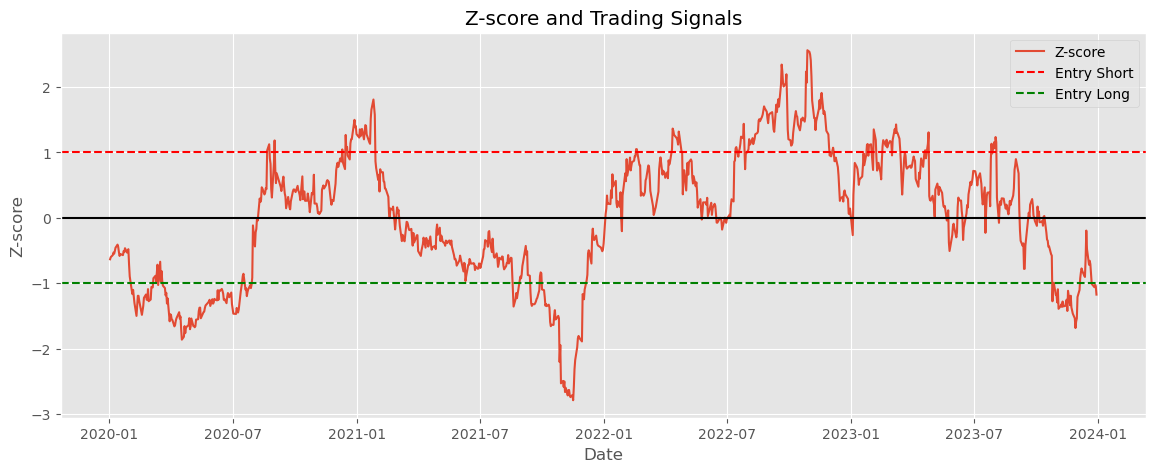

In [6]:
signals, zscore = generate_zscore_signals(spread)

plt.figure(figsize=(14, 5))
plt.plot(zscore, label='Z-score')
plt.axhline(1.0, color='r', linestyle='--', label='Entry Short')
plt.axhline(-1.0, color='g', linestyle='--', label='Entry Long')
plt.axhline(0.0, color='black', linestyle='-')
plt.legend()
plt.title("Z-score and Trading Signals")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.show()


Compute Daily Returns

In [7]:
returns = compute_returns(combined_df)


Backtest Strategy

In [8]:
strat_returns = signals.shift(1) * (returns['AAPL'] - hedge_ratio * returns['MSFT'])
pnl_df = compute_pnl_metrics(strat_returns)


Apply Trading Costs

In [9]:
net_strat_returns = apply_trading_costs(signals.shift(1), strat_returns)


Plot Cumulative Returns

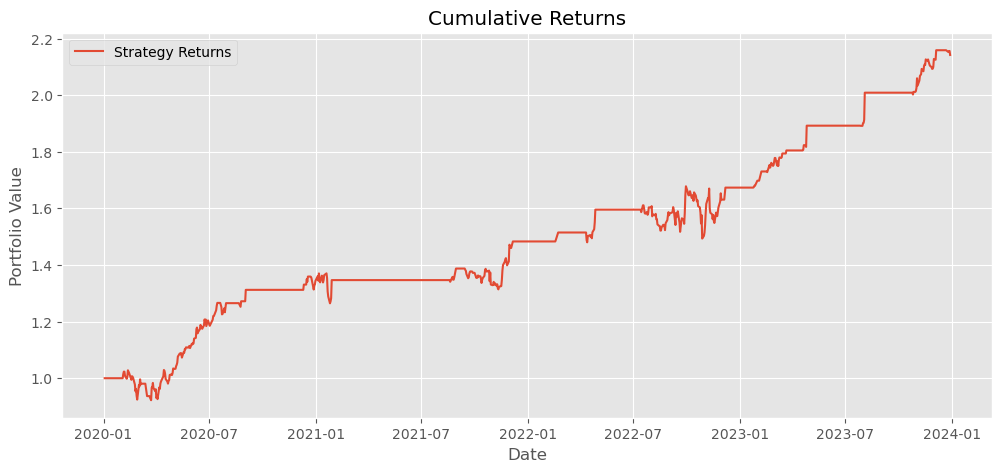

In [10]:
plot_cumulative_returns(pnl_df['Cumulative Return'])


Trade Log

In [11]:
trade_log = log_trades(signals, combined_df)
trade_log.head()


,Date,Signal,AAPL_Price,MSFT_Price
0,2020-02-03,1,74.7279,166.4582
1,2020-03-06,0,70.1415,154.6514
2,2020-03-13,1,67.4575,152.0287
3,2020-03-16,0,58.7793,129.6212
4,2020-03-20,1,55.6318,131.4685


Evaluate Strategy

In [12]:
metrics = evaluate_strategy(pnl_df)
for k, v in metrics.items():
    print(f"{k}: {v}")


Total Return: 114.20%
Annualized Return: 21.02%
Annualized Volatility: 13.47%
Sharpe Ratio: 1.41
Max Drawdown: -11.01%


Visualize Entry/Exit on Price Chart

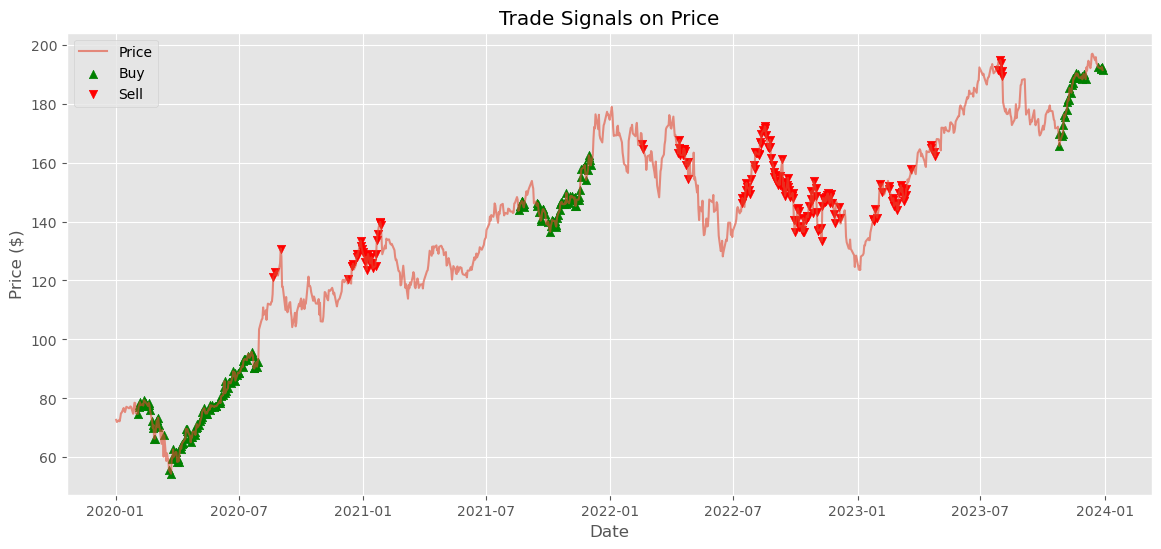

In [13]:
plot_trade_signals(combined_df['AAPL'], signals)


Export Outputs

In [14]:
os.makedirs('outputs', exist_ok=True)
pnl_df.to_csv('outputs/pnl_aapl_msft.csv')
trade_log.to_csv('outputs/trades_aapl_msft.csv')
plt.savefig('outputs/plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
import sys
sys.path.append('..')  # go up one level from notebooks/
from batch_test import run_batch_test

summary_df = run_batch_test()
summary_df.head()


Processing: AAPL / MSFT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing: GOOG / META


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing: JPM / BAC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing: XOM / CVX
